In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading the datasets
df1=pd.read_csv("Unemployment in India.csv")
df2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df1.shape

(768, 7)

In [4]:
df1.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df1.tail(20)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
748,West Bengal,31-01-2020,Monthly,7.27,11208617.0,45.39,Urban
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df1.drop('Area', axis=1)

In [7]:
df2.shape

(267, 9)

In [8]:
df2.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
df2 = df2.drop('Region.1', axis=1)

In [10]:
df = pd.merge(df1, df2[['Region', 'latitude', 'longitude']], on='Region', how='left')

In [11]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),latitude,longitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,79.74,15.9129
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,79.74,15.9129
2,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,79.74,15.9129
3,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,79.74,15.9129
4,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,79.74,15.9129
...,...,...,...,...,...,...,...,...
7260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.duplicated().sum()

6524

In [13]:
df = df.drop_duplicates()
df.shape

(741, 8)

In [14]:
data = pd.concat([df, df2], axis=0, ignore_index=True)


In [15]:
data.shape

(1008, 8)

In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

Region                                       1
 Date                                        1
 Frequency                                   1
 Estimated Unemployment Rate (%)             1
 Estimated Employed                          1
 Estimated Labour Participation Rate (%)     1
latitude                                    13
longitude                                   13
dtype: int64

In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

columns_to_impute = data.columns[6:8]  

# Filter the dataset to include only the columns to impute
features = data[columns_to_impute]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)  # Specify the number of neighbors
imputed_features = knn_imputer.fit_transform(scaled_features)

# Inverse transform the scaled features to get the original values
imputed_features = scaler.inverse_transform(imputed_features)

# Replace the original dataset with the imputed values
data.loc[:, columns_to_impute] = imputed_features

# Display the updated DataFrame
print(data)

              Region         Date  Frequency  \
0     Andhra Pradesh   31-05-2019    Monthly   
1     Andhra Pradesh   30-06-2019    Monthly   
2     Andhra Pradesh   31-07-2019    Monthly   
3     Andhra Pradesh   31-08-2019    Monthly   
4     Andhra Pradesh   30-09-2019    Monthly   
...              ...          ...        ...   
1003     West Bengal   30-06-2020          M   
1004     West Bengal   31-07-2020          M   
1005     West Bengal   31-08-2020          M   
1006     West Bengal   30-09-2020          M   
1007     West Bengal   31-10-2020          M   

       Estimated Unemployment Rate (%)   Estimated Employed  \
0                                 3.65           11999139.0   
1                                 3.05           11755881.0   
2                                 3.75           12086707.0   
3                                 3.32           12285693.0   
4                                 5.17           12256762.0   
...                                ...       

In [19]:
data.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
latitude                                    0
longitude                                   0
dtype: int64

In [20]:
# Assuming 'data' is your DataFrame
rows_with_null = data[data.isnull().any(axis=1)]
print(rows_with_null)


    Region  Date  Frequency   Estimated Unemployment Rate (%)  \
359    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   latitude  \
359                  NaN                                       NaN  80.498733   

     longitude  
359  22.789695  


In [21]:
index_to_drop = 359
data.drop(index=index_to_drop, inplace=True)

In [39]:
data.tail(5)

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,latitude,longitude,Month,year,Month_Name
1003,West Bengal,2020-06-30,M,7.29,30726310.0,40.39,87.855,22.9868,6,2020,Jun
1004,West Bengal,2020-07-31,M,6.83,35372506.0,46.17,87.855,22.9868,7,2020,Jul
1005,West Bengal,2020-08-31,M,14.87,33298644.0,47.48,87.855,22.9868,8,2020,Aug
1006,West Bengal,2020-09-30,M,9.35,35707239.0,47.73,87.855,22.9868,9,2020,Sep
1007,West Bengal,2020-10-31,M,9.98,33962549.0,45.63,87.855,22.9868,10,2020,Oct


In [48]:
print(data.columns)

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'latitude',
       'longitude', 'Month', 'year', 'Month_Name'],
      dtype='object')


In [24]:
data[" Date"] = pd.to_datetime(data[" Date"])

In [25]:
data["Month"] = data[" Date"].dt.month
data["year"] = data[" Date"].dt.year

In [26]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),latitude,longitude,Month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,79.74,15.9129,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,79.74,15.9129,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,79.74,15.9129,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,79.74,15.9129,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,79.74,15.9129,9,2019


In [27]:
import calendar
data["Month_Name"] = data["Month"].apply(lambda x : calendar.month_abbr[x])

In [28]:
data.Month_Name.unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

In [35]:
#updating column names
data.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','latitude','longitude','Month','year','Month_Name']

## EDA

<Axes: ylabel='state'>

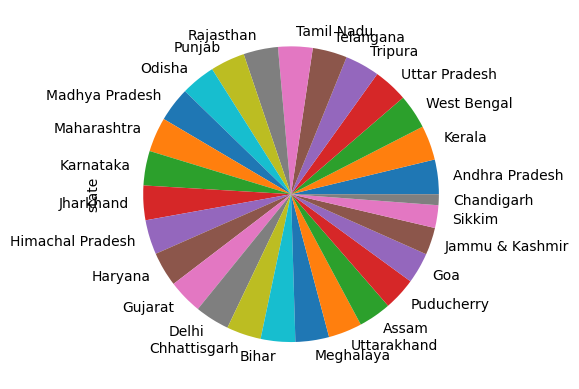

In [36]:
data['state'].value_counts().plot.pie()

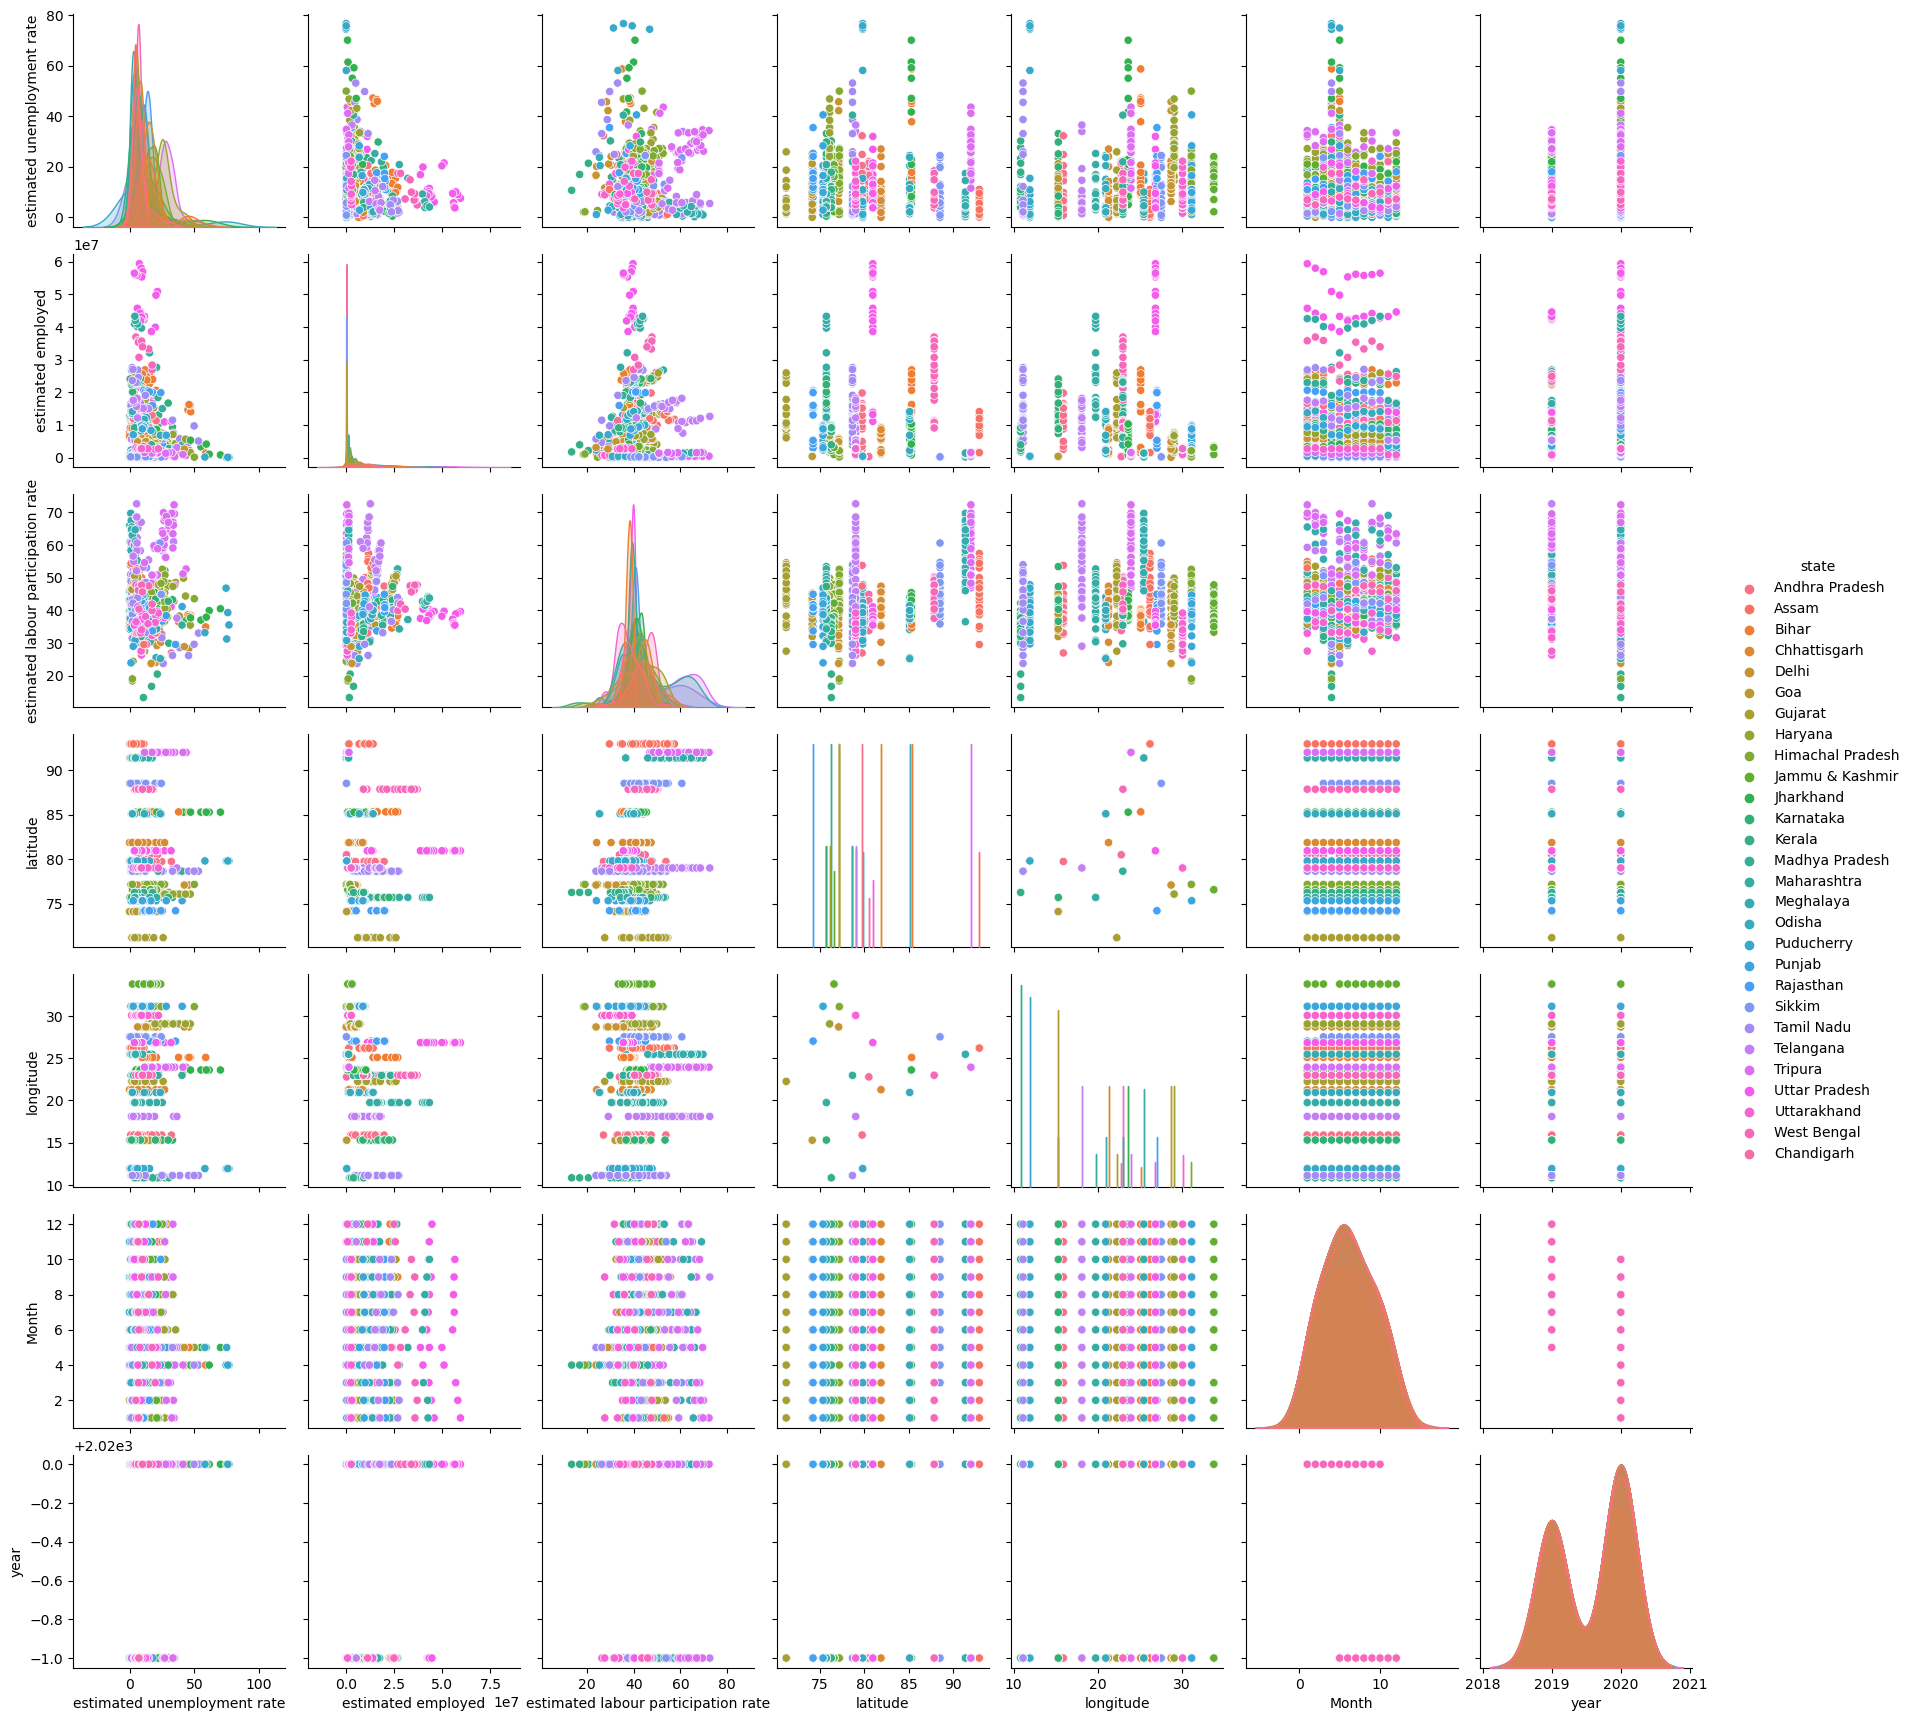

In [31]:
sns.pairplot(data = data , hue = 'state')


In [ ]:
plt.figure(figsize=(25, 20))
for i,z in enumerate(['estimated unemployment rate','estimated employed', 'estimated labour participation rate']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=z, hue="state", data=data, kde=True, palette="Set1")
    
    plt.ylabel("Count")
plt.title("Histogram of Estimated Employment Rate by region")
plt.show()

In [ ]:
# top 10 states with greatest unemployment rate for different months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [ ]:
# Choro
fig = px.scatter_geo(data,'longitude', 'latitude', color="state",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="Month_Name",scope='asia',title='Impact of lockdown on employement across regions')

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[60, 100],oceancolor="#6dd5ed",
    showocean=True)


fig.show()

<Axes: >

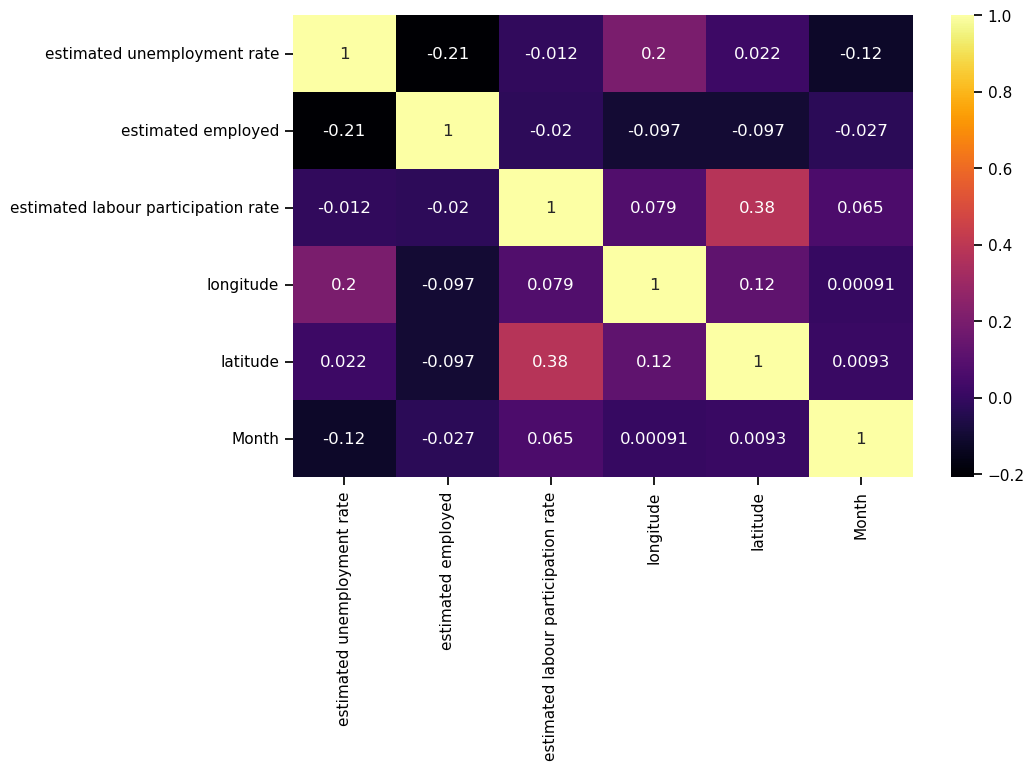

In [32]:
#heatmap of correlations

heat_maps = data[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'longitude', 'latitude', 'Month']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='inferno')

In [ ]:
#box plot using Plotly Express

fig = px.box(data, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
#bar chart of average unemployment rate by state

plot_ump = data[['estimated unemployment rate', 'state']]
unemp = plot_ump.groupby('state').mean().reset_index()
unemp = unemp.sort_values('estimated unemployment rate')
fig = px.bar(unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

## Time series analysis

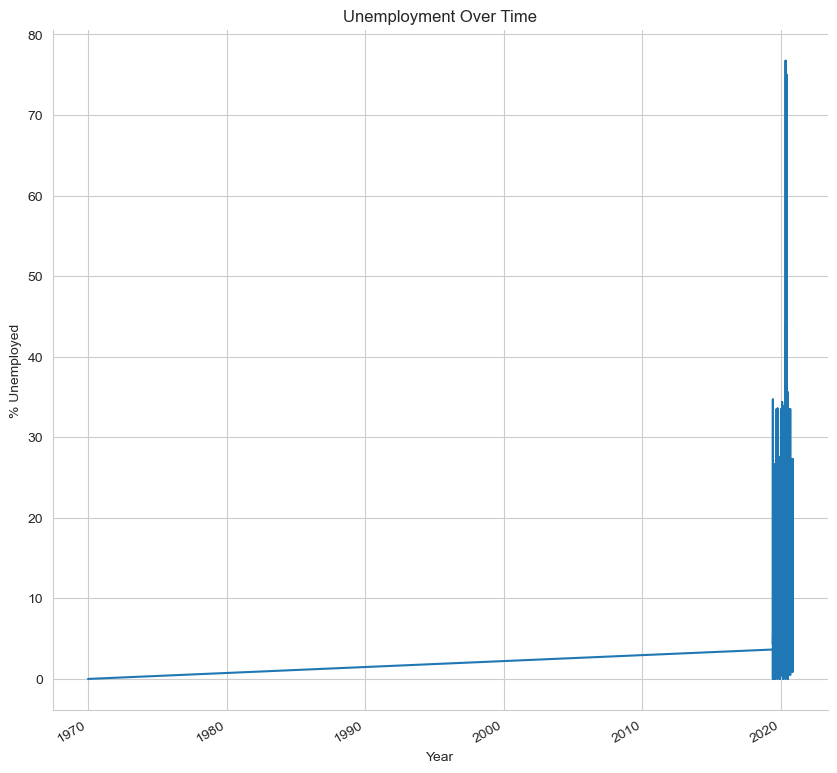

In [54]:
figure = plt.figure(figsize=(10, 10))
axe = figure.gca()
sns.set_style("whitegrid")
data.plot(x="date", y="estimated unemployment rate", ax=axe, legend=False)
axe.set_title("Unemployment Over Time")
axe.set_ylabel("% Unemployed")
axe.set_xlabel("Year")
sns.despine()

In [33]:
##Stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['estimated unemployment rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -11.209070763327444
p-value: 2.148051892914336e-20


In [34]:
##Modeling
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['estimated unemployment rate'], order=(1, 1, 1))
results = model.fit()

In [35]:
results

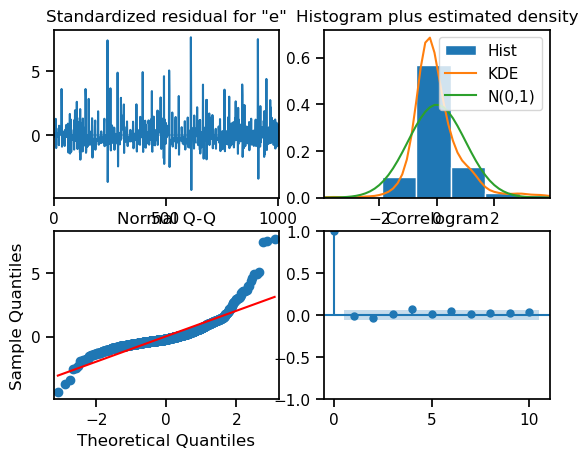

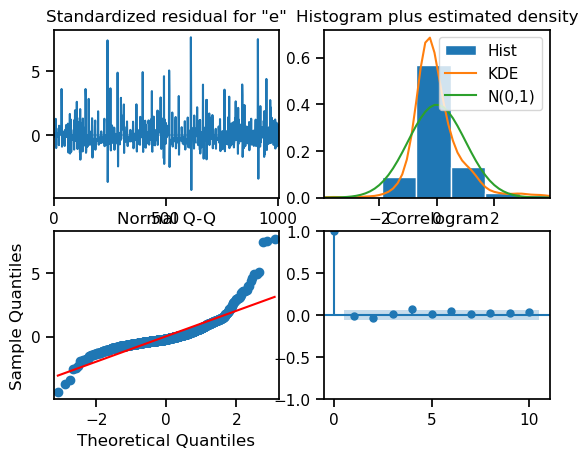

In [39]:
results.plot_diagnostics()

In [42]:
results.forecast(steps=10)

1008    11.050705
1009    11.599320
1010    11.880423
1011    12.024456
1012    12.098257
1013    12.136072
1014    12.155447
1015    12.165375
1016    12.170462
1017    12.173069
Name: predicted_mean, dtype: float64

In [44]:
##Forecasting
forecast=results.get_forecast(steps=10).summary_frame()

In [45]:
forecast

estimated unemployment rate,mean,mean_se,mean_ci_lower,mean_ci_upper
1008,11.050705,9.223794,-7.027599,29.129008
1009,11.599320,10.377807,-8.740808,31.939447
1010,11.880423,10.666983,-9.026480,32.787326
1011,12.024456,10.745179,-9.035707,33.084619
1012,12.098257,10.767499,-9.005654,33.202168
1013,12.136072,10.774380,-8.981325,33.253468
1014,12.155447,10.776775,-8.966643,33.277538
1015,12.165375,10.777768,-8.958662,33.289412
1016,12.170462,10.778278,-8.954574,33.295499
1017,12.173069,10.778602,-8.952603,33.298741


In [48]:
forecast_index = pd.date_range(start=data.index[-1], periods=10, freq='M')
forecast_values = forecast.mean


In [49]:
forecast_index

DatetimeIndex(['1970-01-31 00:00:00.000001007',
               '1970-02-28 00:00:00.000001007',
               '1970-03-31 00:00:00.000001007',
               '1970-04-30 00:00:00.000001007',
               '1970-05-31 00:00:00.000001007',
               '1970-06-30 00:00:00.000001007',
               '1970-07-31 00:00:00.000001007',
               '1970-08-31 00:00:00.000001007',
               '1970-09-30 00:00:00.000001007',
               '1970-10-31 00:00:00.000001007'],
              dtype='datetime64[ns]', freq='M')

In [50]:
forecast_values

<bound method NDFrame._add_numeric_operations.<locals>.mean of estimated unemployment rate       mean    mean_se  mean_ci_lower  \
1008                         11.050705   9.223794      -7.027599   
1009                         11.599320  10.377807      -8.740808   
1010                         11.880423  10.666983      -9.026480   
1011                         12.024456  10.745179      -9.035707   
1012                         12.098257  10.767499      -9.005654   
1013                         12.136072  10.774380      -8.981325   
1014                         12.155447  10.776775      -8.966643   
1015                         12.165375  10.777768      -8.958662   
1016                         12.170462  10.778278      -8.954574   
1017                         12.173069  10.778602      -8.952603   

estimated unemployment rate  mean_ci_upper  
1008                             29.129008  
1009                             31.939447  
1010                             32.787326  
1011    

In [32]:
# Perform one-hot encoding for the 'Region' column
#data_encoded = pd.get_dummies(data, columns=['state'], drop_first=True)

In [94]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(data[['state']])

# Get the unique values in the categorical column
unique_values = data['state'].unique()

# Generate the feature names based on unique values
feature_names = [f"state_{val}" for val in data['state'].unique()]

# Create a DataFrame with the encoded columns and feature names
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

# Concatenate the encoded columns with the original DataFrame
data_encoded = pd.concat([data.drop(columns=['state']), encoded_df], axis=1)

print(data_encoded)


           date frequency  estimated unemployment rate  estimated employed  \
0    2019-05-31   Monthly                         3.65          11999139.0   
1    2019-06-30   Monthly                         3.05          11755881.0   
2    2019-07-31   Monthly                         3.75          12086707.0   
3    2019-08-31   Monthly                         3.32          12285693.0   
4    2019-09-30   Monthly                         5.17          12256762.0   
...         ...       ...                          ...                 ...   
1004 2020-07-31         M                         6.83          35372506.0   
1005 2020-08-31         M                        14.87          33298644.0   
1006 2020-09-30         M                         9.35          35707239.0   
1007 2020-10-31         M                         9.98          33962549.0   
359         NaT       NaN                          NaN                 NaN   

      estimated labour participation rate  latitude  longitude 

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = data_encoded[['estimated employed', 'estimated labour participation rate']+ list(data.columns[11:39])]

# Target variable
y = data_encoded['estimated unemployment rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
y_pred

Mean Squared Error: 92.55703624336364


array([12.19563951, 13.11546546, 13.66039369, 13.50020856, 13.33045286,
       14.44890149, 11.61405255, 12.0569386 ,  4.03484753, 14.27169494,
       12.98052653, 13.77879456,  8.87813909, 11.73417138, 12.60464381,
       14.2893088 , 11.01219201,  2.25020506, 10.3246157 , 12.92233329,
       10.14861735, 14.13506733, 12.94229942, 14.46653998, 13.7017122 ,
       10.27255538, 13.82583465, 10.09434561, 13.55962696,  4.78849003,
       14.32555586, 13.9899916 , 13.07498322, 12.64871318, 10.69021707,
       14.44856763, 13.14431223, 12.87750685, 10.79150537, 11.96536212,
       13.77127542, 12.35989026,  4.49580396,  8.47627087, 12.94127749,
       10.02990217, 13.80665091, 11.75592603,  8.8423207 ,  8.70424199,
       13.6903165 , 14.34057551, 14.35099407, 13.62676929, 13.56823464,
       14.20135529, 13.7284115 , 14.17218826, 11.68611537,  8.69564509,
        8.80446978, 12.93406389, 11.58630107, 12.33066102, 12.34896649,
       13.87117294, 14.23367692,  8.60297875, 13.98951213, 12.67

In [104]:
data_encoded

,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,latitude,longitude,Month,year,Month_Name,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,state_Chandigarh
0,2019-05-31,Monthly,3.65,11999139.0,43.24,79.740,15.9129,5.0,2019.0,May,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-30,Monthly,3.05,11755881.0,42.05,79.740,15.9129,6.0,2019.0,Jun,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-31,Monthly,3.75,12086707.0,43.50,79.740,15.9129,7.0,2019.0,Jul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-08-31,Monthly,3.32,12285693.0,43.97,79.740,15.9129,8.0,2019.0,Aug,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-09-30,Monthly,5.17,12256762.0,44.68,79.740,15.9129,9.0,2019.0,Sep,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2020-05-31,M,17.41,28356675.0,41.92,87.855,22.9868,5.0,2020.0,May,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1003,2020-06-30,M,7.29,30726310.0,40.39,87.855,22.9868,6.0,2020.0,Jun,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1004,2020-07-31,M,6.83,35372506.0,46.17,87.855,22.9868,7.0,2020.0,Jul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1005,2020-08-31,M,14.87,33298644.0,47.48,87.855,22.9868,8.0,2020.0,Aug,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
index_to_drop = [359,1007]
data_encoded.drop(index=index_to_drop, inplace=True)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 90.61894700272279


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svm = SVR(kernel='rbf')

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 88.09302979514071
